<a href="https://colab.research.google.com/github/Ni7070/ASLFinglespellingToAlphabet/blob/master/Fingerspelling_Interpretation_from_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import os
from os import path
import shutil
import glob
import cv2

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tahiranishat","key":"8ed924ff655cd5b32f597aa3e24be0fa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:11<00:00, 69.7MB/s]
100% 1.03G/1.03G [00:11<00:00, 94.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "asl-alphabet.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


In [ ]:
#colab mount
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_dir = '/content/asl_alphabet_train/asl_alphabet_train'
test_dir = '/content/asl_alphabet_test/asl_alphabet_test'
test_d_dir = '/content/gdrive/MyDrive/Colab Notebooks/asl_alphabet_test/asl_alphabet_test'

In [ ]:
from torchvision import datasets, transforms
import torch
mean = [0.5,]
std = [0.5, ]
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    
])
      
    
dataset = datasets.ImageFolder(root=train_dir, transform=transform)
 

In [ ]:
len(dataset)

87000

In [ ]:
test_size = 0.2
torch.manual_seed(1)
num_train_samples = len(dataset)
indices = torch.randperm(num_train_samples)

split = int(num_train_samples * test_size)

train_dataset = torch.utils.data.Subset(dataset, indices[split:])
test_dataset = torch.utils.data.Subset(dataset, indices[:split])

len(train_dataset), len(test_dataset)

(69600, 17400)

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 3000
input_dim = 224*224 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 29
learning_rate = 0.001


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size, 
                                               shuffle=True, 
                                               )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              )


In [ ]:
#label of the train classes
train_classes = train_loader.dataset.dataset.classes
test_classes = test_loader.dataset.dataset.classes
print("train classes labels: ",train_classes)
print("test classes labels: ",test_classes)

train classes labels:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
test classes labels:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
#number of data in each classes
class_count = {}
for _, index in dataset:
    label = train_classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'A': 3000,
 'B': 3000,
 'C': 3000,
 'D': 3000,
 'E': 3000,
 'F': 3000,
 'G': 3000,
 'H': 3000,
 'I': 3000,
 'J': 3000,
 'K': 3000,
 'L': 3000,
 'M': 3000,
 'N': 3000,
 'O': 3000,
 'P': 3000,
 'Q': 3000,
 'R': 3000,
 'S': 3000,
 'T': 3000,
 'U': 3000,
 'V': 3000,
 'W': 3000,
 'X': 3000,
 'Y': 3000,
 'Z': 3000,
 'del': 3000,
 'nothing': 3000,
 'space': 3000}

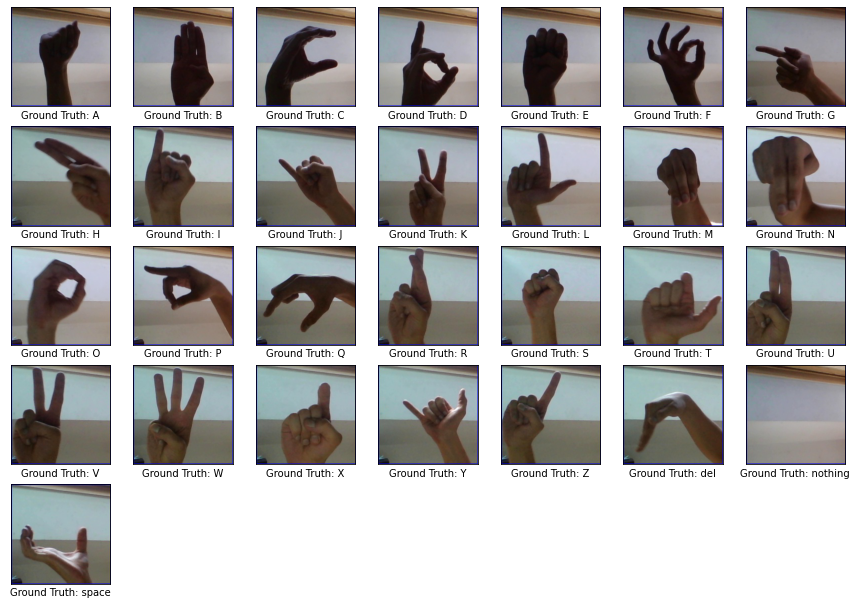

In [ ]:
#displaying 1 image from each train class
plt.figure(figsize=(15, 15))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(train_classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel("Ground Truth: "+train_classes[i])

Ground truth U


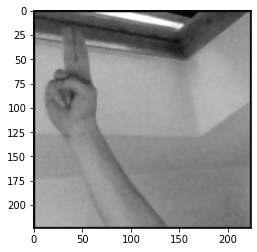

In [ ]:
#classes = train_loader.dataset.dataset.classes
for img, label in train_loader:
    print('Ground truth', train_classes[label[0]])
    plt.imshow(img[0].reshape(224, 224), cmap = "gray")
    plt.show()
    break

**Demo 01:**

In [ ]:
# Hyperparameters
batch_size = 128
num_iters = 3000
input_dim = 224*224 # num_features = 784
num_hidden = 120
output_dim = 29

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_dim, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.tanh = nn.Tanh()

        ### 2nd hidden layer:
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.leaky_relu_1 = nn.LeakyReLU()

        ### 3rd hidden layer: 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_1 = nn.ReLU6()


        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.sigmoid = nn.Sigmoid()

        ### Output layer: 
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ## 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.tanh(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.leaky_relu_1(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_1(out)

        ### 4th hidden layer 
        out  = self.linear_5(out)
        ### Non-linearity in 4th hidden layer
        out = self.sigmoid(out)
        
        # Linear layer (output)
        logits  = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return probas


model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
'''
TRAIN THE MODEL
'''
iter = 0
iteration_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 3.254805088043213. Accuracy: 18.862068965517242
Iteration: 1000. Loss: 3.1898610591888428. Accuracy: 24.591954022988507
Iteration: 1500. Loss: 3.0926849842071533. Accuracy: 26.82758620689655
Iteration: 2000. Loss: 3.1085731983184814. Accuracy: 29.402298850574713
Iteration: 2500. Loss: 3.1621031761169434. Accuracy: 30.396551724137932


[3.254805088043213, 3.1898610591888428, 3.0926849842071533, 3.1085731983184814, 3.1621031761169434]


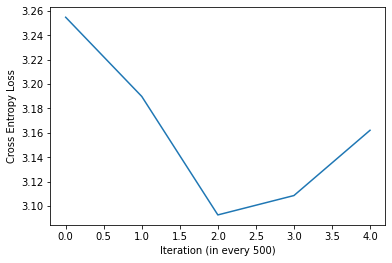

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**demo :02**

In [ ]:
# Hyperparameters
batch_size = 128
num_iters = 3000
input_dim = 224*224 # num_features = 784
num_hidden = 120
output_dim = 29

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_dim, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.tanh = nn.Tanh()

        ### 2nd hidden layer:
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.leaky_relu_1 = nn.LeakyReLU()

        ### 3rd hidden layer: 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_1 = nn.ReLU6()


        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.sigmoid = nn.Sigmoid()

        ### Output layer: 
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ## 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.tanh(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.leaky_relu_1(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_1(out)

        ### 4th hidden layer 
        out  = self.linear_5(out)
        ### Non-linearity in 4th hidden layer
        out = self.sigmoid(out)
        
        # Linear layer (output)
        logits  = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return probas


model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
'''
TRAIN THE MODEL
'''
iter = 0
iteration_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 3.2796342372894287. Accuracy: 17.632183908045977
Iteration: 1000. Loss: 3.1829161643981934. Accuracy: 20.971264367816094
Iteration: 1500. Loss: 3.2478904724121094. Accuracy: 22.724137931034484
Iteration: 2000. Loss: 3.1428582668304443. Accuracy: 24.201149425287355
Iteration: 2500. Loss: 3.189634084701538. Accuracy: 25.080459770114942


[3.2796342372894287, 3.1829161643981934, 3.2478904724121094, 3.1428582668304443, 3.189634084701538]


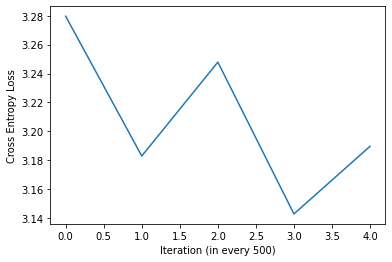

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Demo 03**

In [ ]:
# Hyperparameters 1st
batch_size = 120
num_iters = 3000
input_dim = 224*224 # num_features = 784
output_dim = 29

learning_rate = 0.01


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True
                                           )  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
p = []
l = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        #print(iter)

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                pt = predicted.cpu()
                lt = labels.cpu()
                #taking all predicted label into a list
                p.append(pt)
                #taking all real label into a list
                l.append(lt)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9258763790130615. Accuracy: 70.45402298850574
Iteration: 1000. Loss: 0.3964533805847168. Accuracy: 81.01149425287356
Iteration: 1500. Loss: 0.38189420104026794. Accuracy: 83.30459770114942
Iteration: 2000. Loss: 0.3301955461502075. Accuracy: 88.33908045977012
Iteration: 2500. Loss: 0.24769805371761322. Accuracy: 90.36206896551724


[0.9258763790130615, 0.3964533805847168, 0.38189420104026794, 0.3301955461502075, 0.24769805371761322]


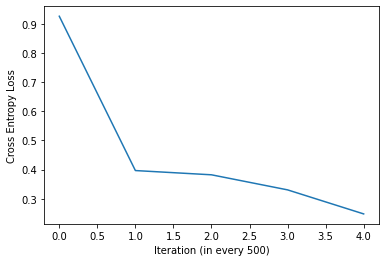

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Settings: 01**

In [ ]:
# Hyperparameters 1st
batch_size = 120
num_iters = 3000
input_dim = 224*224 # num_features = 784
num_hidden = 120
output_dim = 29

learning_rate = 0.01


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True
                                           )  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
p = []
l = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        #print(iter)

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                pt = predicted.cpu()
                lt = labels.cpu()
                #taking all predicted label into a list
                p.append(pt)
                #taking all real label into a list
                l.append(lt)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.8638079166412354. Accuracy: 72.10344827586206
Iteration: 1000. Loss: 0.31180694699287415. Accuracy: 90.13218390804597
Iteration: 1500. Loss: 0.1468484103679657. Accuracy: 93.7183908045977
Iteration: 2000. Loss: 0.0769047662615776. Accuracy: 96.58620689655173
Iteration: 2500. Loss: 0.14038872718811035. Accuracy: 97.29885057471265


[0.8638079166412354, 0.31180694699287415, 0.1468484103679657, 0.0769047662615776, 0.14038872718811035]


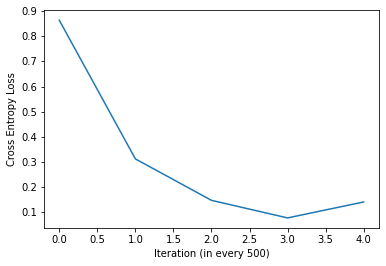

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

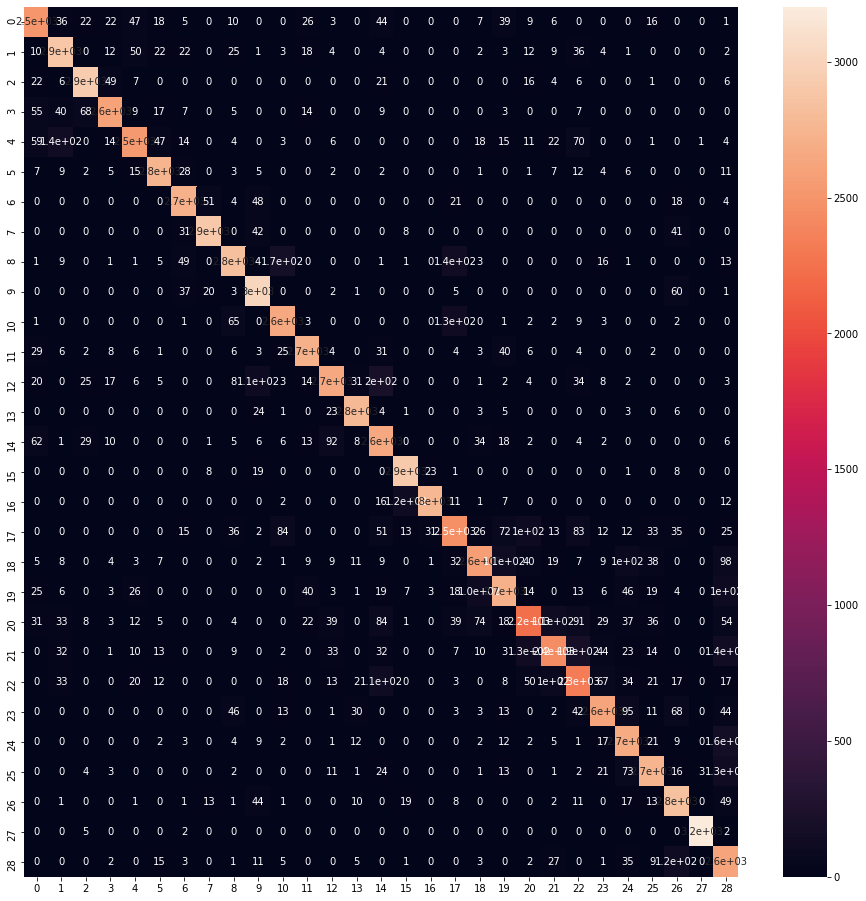

In [ ]:
import itertools
import seaborn as sns


#flatten predicted labels and real labels
flatten_l = list(itertools.chain.from_iterable(l))
flatten_p = list(itertools.chain.from_iterable(p))

fig, ax = plt.subplots(figsize=(16, 16))
from sklearn.metrics import confusion_matrix
# Confusion matrix
conf_mat=confusion_matrix(flatten_l, flatten_p)
# print(conf_mat)
sns.heatmap(conf_mat, annot=True)

In [ ]:
print(classification_report(flatten_l, flatten_p))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2815
           1       0.89      0.92      0.91      3130
           2       0.95      0.96      0.95      3075
           3       0.94      0.92      0.93      2845
           4       0.92      0.86      0.89      2955
           5       0.94      0.96      0.95      2870
           6       0.93      0.95      0.94      2870
           7       0.97      0.96      0.96      3035
           8       0.92      0.87      0.90      3250
           9       0.90      0.96      0.93      3150
          10       0.89      0.92      0.90      2860
          11       0.94      0.94      0.94      2895
          12       0.92      0.84      0.88      3150
          13       0.96      0.98      0.97      2855
          14       0.80      0.90      0.85      2940
          15       0.94      0.98      0.96      2985
          16       0.98      0.94      0.96      2935
          17       0.85    

In [ ]:
root_path = "/content/gdrive/MyDrive/Colab Notebooks/pickle Files/"
save_model = True
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'asl02.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'asl02.pkl'))

Right: 29  Wrong:  0 
right Assumed: 100.0 % Wrong Assumed: 0.0 %


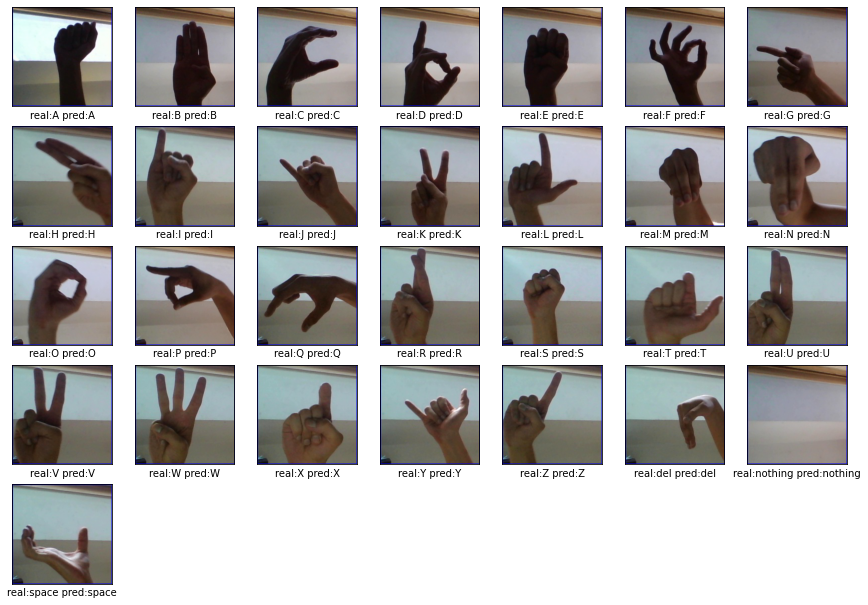

In [ ]:
#For test data
testing_dataset = datasets.ImageFolder(root=test_d_dir, transform=transform)
testing_loader = torch.utils.data.DataLoader(dataset=testing_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
for images, labels in testing_loader:
  break

predicted =  model.forward(images[:29].view(-1, 224*224).to(device))
predicted = torch.argmax(predicted, dim=1)

# print('Predicted: \n', ' '.join('%29s\n' % classes[predicted[j]]
#                                for j in range(29)))

fig, ax = plt.subplots(figsize=(15, 15))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = test_d_dir + "/{0}/{0}_test.jpg".format(test_classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel("real:"+test_classes[i]+" pred:"+test_classes[predicted[i]])

rcount = 0
wcount = 0
for x in range (0,29):
  if test_classes[x] == test_classes[predicted[x]]:
    rcount = rcount + 1
  else:
    wcount = wcount + 1
rp = (rcount/29)*100
wp = 100-rp
print("Right:",rcount," Wrong: " , wcount, "\nright Assumed:", rp,"%", "Wrong Assumed:", wp,"%")

**Settings: 02**

In [ ]:
# Hyperparameters 1st
batch_size = 120
num_iters = 4000
input_dim = 224*224 # num_features = 784

output_dim = 29

learning_rate = 0.01


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True
                                           )  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
p = []
l = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        #print(iter)

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                pt = predicted.cpu()
                lt = labels.cpu()
                #taking all predicted label into a list
                p.append(pt)
                #taking all real label into a list
                l.append(lt)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.5851841568946838. Accuracy: 80.34482758620689
Iteration: 1000. Loss: 0.29847148060798645. Accuracy: 91.61494252873563
Iteration: 1500. Loss: 0.13727028667926788. Accuracy: 95.13218390804597
Iteration: 2000. Loss: 0.0615202896296978. Accuracy: 97.20689655172414
Iteration: 2500. Loss: 0.06626340001821518. Accuracy: 98.06896551724138
Iteration: 3000. Loss: 0.07554161548614502. Accuracy: 98.79885057471265


[0.5851841568946838, 0.29847148060798645, 0.13727028667926788, 0.0615202896296978, 0.06626340001821518, 0.07554161548614502]


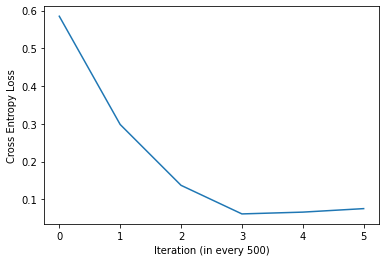

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

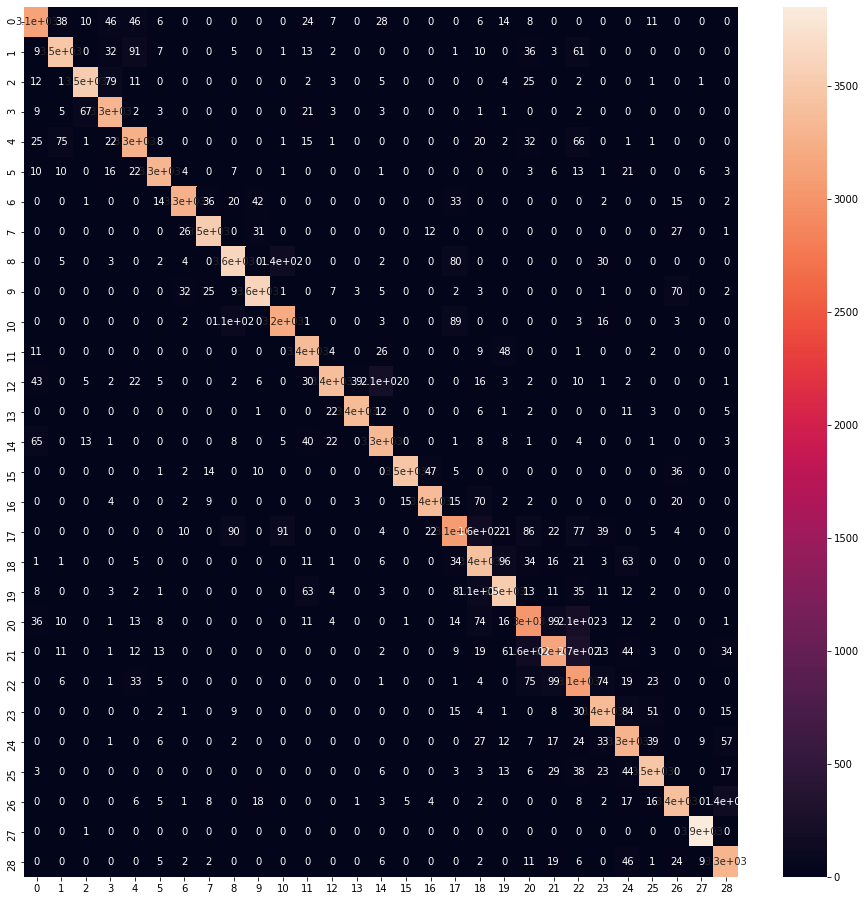

In [ ]:
import itertools
import seaborn as sns


#flatten predicted labels and real labels
flatten_l = list(itertools.chain.from_iterable(l))
flatten_p = list(itertools.chain.from_iterable(p))

fig, ax = plt.subplots(figsize=(16, 16))
from sklearn.metrics import confusion_matrix
# Confusion matrix
conf_mat=confusion_matrix(flatten_l, flatten_p)
# print(conf_mat)
sns.heatmap(conf_mat, annot=True)

In [ ]:
print(classification_report(flatten_l, flatten_p))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3378
           1       0.96      0.93      0.94      3756
           2       0.97      0.96      0.97      3690
           3       0.94      0.97      0.95      3414
           4       0.93      0.92      0.92      3546
           5       0.97      0.96      0.97      3444
           6       0.97      0.95      0.96      3444
           7       0.97      0.97      0.97      3642
           8       0.93      0.93      0.93      3900
           9       0.97      0.96      0.96      3780
          10       0.93      0.93      0.93      3432
          11       0.94      0.97      0.95      3474
          12       0.98      0.90      0.93      3780
          13       0.99      0.98      0.98      3426
          14       0.91      0.95      0.93      3528
          15       0.99      0.97      0.98      3582
          16       0.98      0.96      0.97      3522
          17       0.91    

In [ ]:
root_path = "/content/gdrive/MyDrive/Colab Notebooks/pickle Files"
save_model = True
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'asl03.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'asl03.pkl'))

Right: 29  Wrong:  0 
right Assumed: 100.0 % Wrong Assumed: 0.0 %


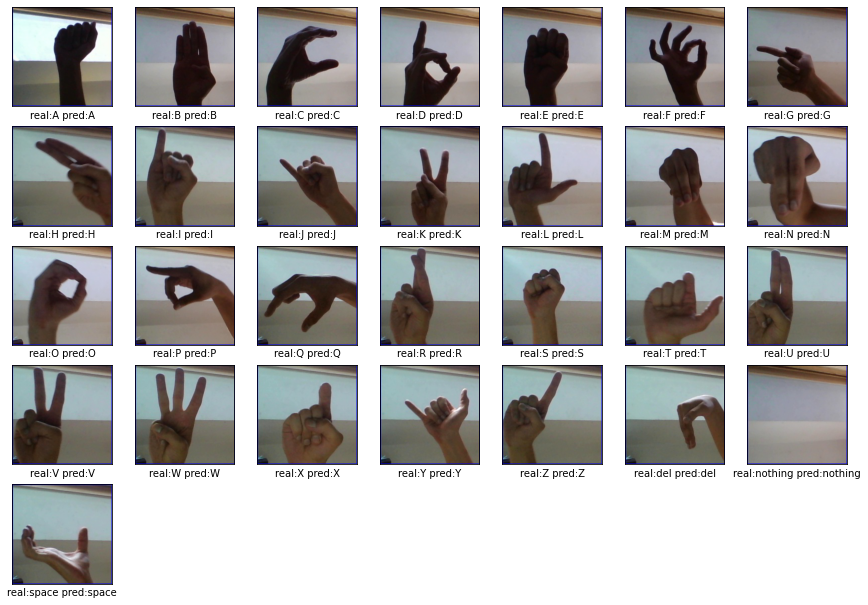

In [ ]:
#For test data
testing_dataset = datasets.ImageFolder(root=test_d_dir, transform=transform)
testing_loader = torch.utils.data.DataLoader(dataset=testing_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
for images, labels in testing_loader:
  break

predicted =  model.forward(images[:29].view(-1, 224*224).to(device))
predicted = torch.argmax(predicted, dim=1)



fig, ax = plt.subplots(figsize=(15, 15))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = test_d_dir + "/{0}/{0}_test.jpg".format(test_classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel("real:"+test_classes[i]+" pred:"+test_classes[predicted[i]])

rcount = 0
wcount = 0
for x in range (0,29):
  if test_classes[x] == test_classes[predicted[x]]:
    rcount = rcount + 1
  else:
    wcount = wcount + 1
rp = (rcount/29)*100
wp = 100-rp
print("Right:",rcount," Wrong: " , wcount, "\nright Assumed:", rp,"%", "Wrong Assumed:", wp,"%")

**Setting: 03**

In [ ]:
# Hyperparameters 1st
batch_size = 160
num_iters = 4000
input_dim = 224*224 # num_features = 784

output_dim = 29

learning_rate = 0.01


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True
                                           )  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
p = []
l = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 224*224).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        #print(iter)

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 224*224).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                pt = predicted.cpu()
                lt = labels.cpu()
                #taking all predicted label into a list
                p.append(pt)
                #taking all real label into a list
                l.append(lt)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6939465999603271. Accuracy: 81.816091954023
Iteration: 1000. Loss: 0.18716615438461304. Accuracy: 92.8735632183908
Iteration: 1500. Loss: 0.10805271565914154. Accuracy: 96.16666666666667
Iteration: 2000. Loss: 0.08962107449769974. Accuracy: 97.27586206896552
Iteration: 2500. Loss: 0.05936429649591446. Accuracy: 98.1896551724138
Iteration: 3000. Loss: 0.02153041586279869. Accuracy: 98.83333333333333
Iteration: 3500. Loss: 0.03512168675661087. Accuracy: 98.95402298850574


[0.6939465999603271, 0.18716615438461304, 0.10805271565914154, 0.08962107449769974, 0.05936429649591446, 0.02153041586279869, 0.03512168675661087]


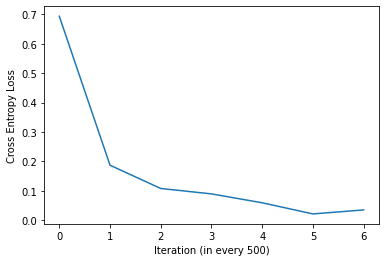

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

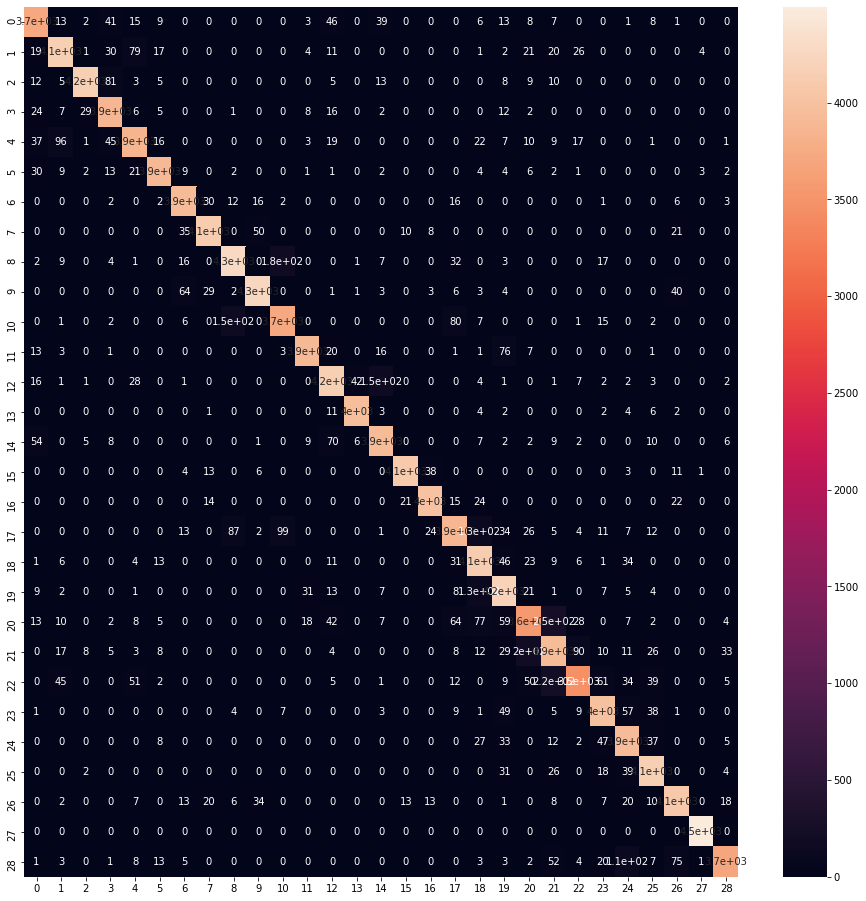

In [ ]:
import itertools
import seaborn as sns


#flatten predicted labels and real labels
flatten_l = list(itertools.chain.from_iterable(l))
flatten_p = list(itertools.chain.from_iterable(p))

fig, ax = plt.subplots(figsize=(16, 16))
from sklearn.metrics import confusion_matrix
# Confusion matrix
conf_mat=confusion_matrix(flatten_l, flatten_p)
# print(conf_mat)
sns.heatmap(conf_mat, annot=True)

In [ ]:
print(classification_report(flatten_l, flatten_p))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3941
           1       0.95      0.95      0.95      4382
           2       0.99      0.96      0.98      4305
           3       0.94      0.97      0.96      3983
           4       0.94      0.93      0.94      4137
           5       0.97      0.97      0.97      4018
           6       0.96      0.98      0.97      4018
           7       0.97      0.97      0.97      4249
           8       0.94      0.94      0.94      4550
           9       0.98      0.96      0.97      4410
          10       0.93      0.93      0.93      4004
          11       0.98      0.96      0.97      4053
          12       0.94      0.94      0.94      4410
          13       0.99      0.99      0.99      3997
          14       0.94      0.95      0.95      4116
          15       0.99      0.98      0.99      4179
          16       0.98      0.98      0.98      4109
          17       0.93    

In [ ]:
root_path = "/content/gdrive/MyDrive/Colab Notebooks/pickle Files"
save_model = True
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'asl04.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'asl04.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


Right: 29  Wrong:  0 
right Assumed: 100.0 % Wrong Assumed: 0.0 %


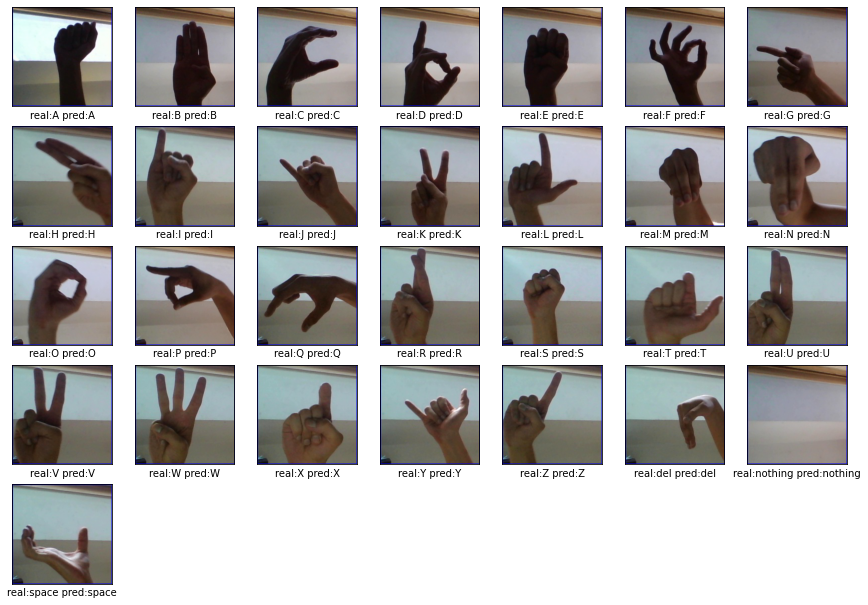

In [ ]:
#For test data
testing_dataset = datasets.ImageFolder(root=test_d_dir, transform=transform)
testing_loader = torch.utils.data.DataLoader(dataset=testing_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
for images, labels in testing_loader:
  break

predicted =  model.forward(images[:29].view(-1, 224*224).to(device))
predicted = torch.argmax(predicted, dim=1)



fig, ax = plt.subplots(figsize=(15, 15))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = test_d_dir + "/{0}/{0}_test.jpg".format(test_classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel("real:"+test_classes[i]+" pred:"+test_classes[predicted[i]])

rcount = 0
wcount = 0
for x in range (0,29):
  if test_classes[x] == test_classes[predicted[x]]:
    rcount = rcount + 1
  else:
    wcount = wcount + 1
rp = (rcount/29)*100
wp = 100-rp
print("Right:",rcount," Wrong: " , wcount, "\nright Assumed:", rp,"%", "Wrong Assumed:", wp,"%")

No.|batch_size | num_iters | learning rate|optimizer|Accuracy
---|---|---|---|---|---|
1|120|3000|0.01|Adagrad|97.29885057471265%
2|120|4000|0.01|Adagrad|98.79885057471265%
3|160|4000|0.01|Adagrad|98.95402298850574%
